In [7]:
import tensorflow as tf
import matplotlib .pyplot as plt
from tensorflow.python.framework import ops
s = tf.Session()
#ops.reset_default_graph()

In [10]:
x_vals = tf.linspace(-1.,1.,50)
target = tf.constant(0.)

In [12]:
l2_y_vals = tf.square(target-x_vals)
l2_y_out = s.run(l2_y_vals)
l2_y_out

array([  1.00000000e+00,   9.20033336e-01,   8.43398571e-01,
         7.70095766e-01,   7.00124979e-01,   6.33486032e-01,
         5.70179105e-01,   5.10204077e-01,   4.53561068e-01,
         4.00249898e-01,   3.50270748e-01,   3.03623468e-01,
         2.60308206e-01,   2.20324874e-01,   1.83673501e-01,
         1.50354013e-01,   1.20366521e-01,   9.37109739e-02,
         7.03873336e-02,   5.03956750e-02,   3.37359533e-02,
         2.04081610e-02,   1.04123307e-02,   3.74844181e-03,
         4.16492723e-04,   4.16492723e-04,   3.74843460e-03,
         1.04123186e-02,   2.04081442e-02,   3.37359533e-02,
         5.03956750e-02,   7.03873336e-02,   9.37109366e-02,
         1.20366484e-01,   1.50353968e-01,   1.83673397e-01,
         2.20324874e-01,   2.60308206e-01,   3.03623468e-01,
         3.50270659e-01,   4.00249809e-01,   4.53560919e-01,
         5.10204077e-01,   5.70179105e-01,   6.33486032e-01,
         7.00124860e-01,   7.70095706e-01,   8.43398452e-01,
         9.20033336e-01,

In [13]:
l1_y_vals = tf.abs(target-x_vals)
l1_y_out = s.run(l1_y_vals)
l1_y_out

array([ 1.        ,  0.95918369,  0.91836733,  0.87755102,  0.83673471,
        0.79591835,  0.75510204,  0.71428573,  0.67346942,  0.63265306,
        0.59183675,  0.55102038,  0.51020408,  0.46938777,  0.42857146,
        0.3877551 ,  0.34693879,  0.30612248,  0.26530612,  0.22448981,
        0.1836735 ,  0.14285713,  0.10204083,  0.06122452,  0.02040815,
        0.02040815,  0.06122446,  0.10204077,  0.14285707,  0.1836735 ,
        0.22448981,  0.26530612,  0.30612242,  0.34693873,  0.38775504,
        0.42857134,  0.46938777,  0.51020408,  0.55102038,  0.59183669,
        0.632653  ,  0.67346931,  0.71428573,  0.75510204,  0.79591835,
        0.83673465,  0.87755096,  0.91836727,  0.95918369,  1.        ], dtype=float32)

In [14]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1),tf.subtract(tf.sqrt(1.+tf.square((target-x_vals)/delta1)),1))
phuber1_y_out = s.run(phuber1_y_vals)
phuber1_y_out

array([ 0.1951941 ,  0.18530704,  0.17544678,  0.16561669,  0.15582101,
        0.14606445,  0.13635282,  0.12669304,  0.11709346,  0.10756432,
        0.0981181 ,  0.08877034,  0.07954054,  0.07045321,  0.06153968,
        0.05284026,  0.04440723,  0.03630884,  0.02863429,  0.02149987,
        0.0150548 ,  0.00948444,  0.00500571,  0.00184693,  0.0002079 ,
        0.0002079 ,  0.00184693,  0.0050057 ,  0.00948443,  0.0150548 ,
        0.02149987,  0.02863429,  0.03630882,  0.04440722,  0.05284025,
        0.06153966,  0.07045321,  0.07954054,  0.08877034,  0.09811808,
        0.1075643 ,  0.11709344,  0.12669304,  0.13635282,  0.14606445,
        0.15582098,  0.16561668,  0.17544676,  0.18530706,  0.1951941 ], dtype=float32)

In [16]:
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = s.run(phuber2_y_vals)

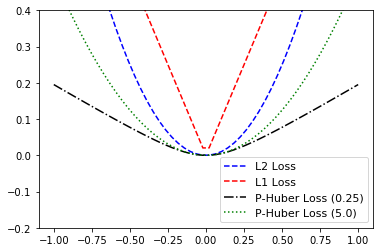

In [17]:
x_array = s.run(x_vals)
plt.plot(x_array,l2_y_out,'b--',label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2,0.4)
plt.legend(loc="lower right",prop = {'size':11})
plt.show()

In [19]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)
targets

<tf.Tensor 'Fill_1:0' shape=(500,) dtype=float32>

In [22]:
hinge_y_vals = tf.maximum(0.,1.-tf.multiply(target,x_vals))
hinge_y_out = s.run(hinge_y_vals)
# hinge_y_out

In [23]:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = s.run(xentropy_y_vals)

In [25]:
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                           labels=target_dist)
print(s.run(softmax_xentropy))

[ 1.16012561]
